In [28]:
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# DATA

In [2]:
(trainX, trainy), (testX, testy)=mnist.load_data()

In [3]:
trainX.shape,testX.shape

((60000, 28, 28), (10000, 28, 28))

# Viewing Data

7


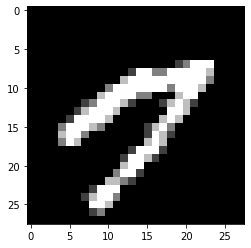

0


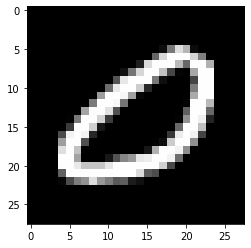

2


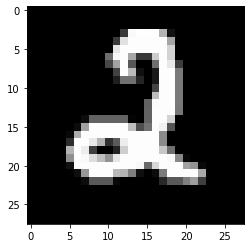

5


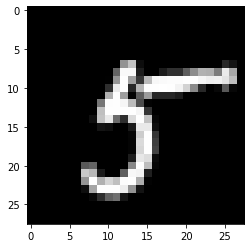

1


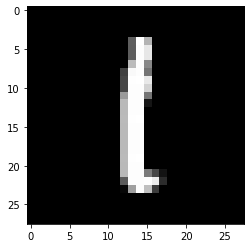

In [4]:
sample=np.random.randint(1,60000,5)
for i in sample:
    print(trainy[i])
    plt.imshow(trainX[i],cmap='gray')
    plt.show()

# Training with MLP

In [5]:
model=MLPClassifier(hidden_layer_sizes=500,activation='relu',random_state=1)

In [6]:
squ_trainX=np.zeros((trainX.shape[0],trainX.shape[1]*trainX.shape[2]))
for i in range(trainX.shape[0]):
    squ_trainX[i]=np.ravel(trainX[i])/255
squ_trainX.shape

(60000, 784)

In [7]:
model=MLPClassifier(random_state=1,hidden_layer_sizes=50,max_iter=100,alpha=0.01,verbose=True,learning_rate_init=0.1,
                    tol=0.001,solver='sgd')

In [8]:
model.fit(squ_trainX,trainy)

Iteration 1, loss = 0.32484982
Iteration 2, loss = 0.15960803
Iteration 3, loss = 0.12264513
Iteration 4, loss = 0.10188910
Iteration 5, loss = 0.08910487
Iteration 6, loss = 0.08259557
Iteration 7, loss = 0.07394721
Iteration 8, loss = 0.06810929
Iteration 9, loss = 0.06373416
Iteration 10, loss = 0.06060770
Iteration 11, loss = 0.05630153
Iteration 12, loss = 0.05381880
Iteration 13, loss = 0.05168535
Iteration 14, loss = 0.04807245
Iteration 15, loss = 0.04714968
Iteration 16, loss = 0.04479970
Iteration 17, loss = 0.04315097
Iteration 18, loss = 0.04150607
Iteration 19, loss = 0.04018001
Iteration 20, loss = 0.03996186
Iteration 21, loss = 0.03822936
Iteration 22, loss = 0.03618962
Iteration 23, loss = 0.03602431
Iteration 24, loss = 0.03585653
Iteration 25, loss = 0.03502134
Iteration 26, loss = 0.03439090
Iteration 27, loss = 0.03385878
Iteration 28, loss = 0.03217574
Iteration 29, loss = 0.03148720
Iteration 30, loss = 0.03106105
Iteration 31, loss = 0.03102836
Iteration 32, los

MLPClassifier(alpha=0.01, hidden_layer_sizes=50, learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', tol=0.001,
              verbose=True)

In [9]:
squ_testX=np.zeros((testX.shape[0],testX.shape[1]*testX.shape[2]))
for i in range(testX.shape[0]):
    squ_testX[i]=np.ravel(testX[i])/255
squ_testX.shape,testy.shape

((10000, 784), (10000,))

In [10]:
accuracy_score(y_true=testy,y_pred=model.predict(squ_testX))

0.9758

# Training with Support Vector Machine

In [29]:
svm_linear_model=svm.SVC(random_state=1,kernel='linear',max_iter=100)
svm_non_linear_model=svm.SVC(random_state=1,kernel='rbf',max_iter=100) #radial_basis_function

In [24]:
scaler=StandardScaler()
scaler.fit(squ_trainX)
normalised_trainX=scaler.transform(squ_trainX)

In [26]:
scaler=StandardScaler()
scaler.fit(squ_testX)
normalised_testX=scaler.transform(squ_testX)

In [25]:
svm_linear_model.fit(normalised_trainX,trainy)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=100, random_state=1)

In [30]:
svm_non_linear_model.fit(normalised_trainX,trainy)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=100, random_state=1)

In [27]:
accuracy_score(y_true=testy,y_pred=svm_linear_model.predict(normalised_testX))

0.7352

In [31]:
accuracy_score(y_true=testy,y_pred=svm_non_linear_model.predict(normalised_testX))

0.7979